In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd # data processing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,Dropout,LSTM, Bidirectional
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization, Dropout
from keras.layers import Dense, Activation
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import torch
from torch.nn import Transformer
from sklearn.preprocessing import StandardScaler #good
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler
from sklearn import metrics #accuracy measure
import joblib
import warnings

In [2]:
training_set=os.listdir("./training_set_df_acc_win3/")
df=None
for data in training_set:
    if data.endswith('.csv'):
        file=f"./training_set_df_acc_win3/{data}"
        if df is None:
            df=pd.read_csv(file)
        else:
            d=pd.read_csv(file)
            df=pd.concat([df,d])


In [3]:
df=df.astype(float)
df['label']=df['label'].astype(int)
df['label']=df['label'].astype("category")

In [4]:
test=pd.read_csv('./test_set_df_acc_win1/S08T1.csv')


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 14197 entries, 0 to 171
Data columns (total 2998 columns):
 #     Column                                              Dtype   
---    ------                                              -----   
 0     left_elbow_shoulder_hip mean_ft                     float64 
 1     left_elbow_shoulder_hip std_ft                      float64 
 2     left_elbow_shoulder_hip max_ft                      float64 
 3     left_elbow_shoulder_hip min_ft                      float64 
 4     left_elbow_shoulder_hip var_ft                      float64 
 5     left_elbow_shoulder_hip med_ft                      float64 
 6     left_elbow_shoulder_hip sum_ft                      float64 
 7     left_elbow_shoulder_hip std                         float64 
 8     left_elbow_shoulder_hip kurtosis                    float64 
 9     left_elbow_shoulder_hip skew                        float64 
 10    left_elbow_shoulder_hip quantile 25                 float64 
 11    left_

/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='label', ylabel='Count'>

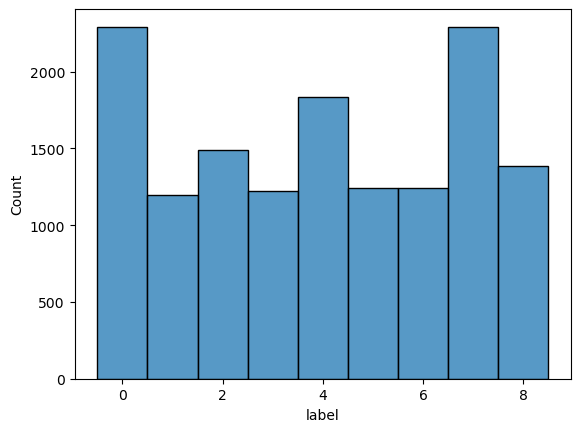

In [6]:
sns.histplot(df["label"])

In [7]:
X=df.drop(["label","previous_label"],axis=1)
y=df['label']

In [8]:
X.shape

(14197, 2996)

In [9]:
y.shape

(14197,)

In [10]:
# from xgboost import XGBClassifier#XGBcalssifier
# xgbcl=XGBClassifier( eval_metric='logloss', random_state=10)
# xgbcl.fit(X_train,y_train)
# # filename = './xgb_model.sav'
# # xgbcl=joblib.load(filename)
# pred=xgbcl.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [11]:
# from sklearn.ensemble import RandomForestClassifier #Random Forest
# rf=RandomForestClassifier(random_state=10)
# rf.fit(X_train,y_train)
# pred=rf.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [12]:
# import joblib
# filename = './xgb_model.sav'
# joblib.dump(xgbcl, filename)

In [13]:
# from sklearn.svm import SVC
# svc=SVC()
# svc.fit(X_train,y_train)
# pred=svc.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [14]:
# from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
# knn = RadiusNeighborsClassifier(radius=175)
# knn.fit(X_train,y_train)
# pred=knn.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [15]:
# from sklearn.linear_model import SGDClassifier
## sgd=SGDClassifier()loss='epsilon_insensitive'
# sgd.fit(X_train,y_train)
# pred=sgd.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [16]:
from sklearn.feature_selection import SelectKBest,f_regression
# Applying SelectKBest class to extract top 15 best features
fs = SelectKBest(score_func=f_regression,k=15)
# Applying feature selection
fit = fs.fit(X,y)
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(300,columns="F_Score"))
# dfi.export(feature_score.nlargest(16,columns="F_Score"),'./image/fulltest/f_test.png')
# feature_score.nlargest(300,columns="F_Score")['Input_Features'].values

                                Input_Features      F_Score
293                           left_elbow_x MAV  4459.041880
348                           left_wrist_x RMS  4455.470312
2508                movingright_elbow_y max_ft  4398.441768
2737      movingright_shoulder left_ear dy std  4339.778545
2891  movingright_shoulder right_wrist_ dx std  4190.773434
...                                        ...          ...
2947    movingright_shoulder right_hip_ dx std  1036.153477
222                            right_ear_y RMS  1032.018003
477         right_shoulder left_eye_ dx std_ft  1031.186672
2722  movingright_shoulder left_ear_ dx sum_ft  1029.490447
393                          left_hip_x std_ft  1027.528533

[300 rows x 2 columns]


In [17]:
X_train=X#[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_train=y
X_test=test.drop(["label","previous_label"],axis=1)
# X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_test=test['label']


In [18]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier #Random Forest
# try:
# oversampling the train dataset using SMOTE

sm = SMOTE()
all_feature_smote, all_label_smote = sm.fit_resample(X_train,y_train)
# rf=RandomForestClassifier(random_state=10,n_estimators=3000,criterion='log_loss')
# rf.fit(all_feature_smote, all_label_smote)
# # filename = './model/smote_rf_model.sav'
# # rf=joblib.load(filename)
# pred_rf=rf.predict(X_test)

# print(metrics.classification_report(pred_rf,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_rf,y_test, normalize='true')
# sns.heatmap(conf,annot=True)



In [19]:
# filename = './model/smote_rf_model2.sav'
# joblib.dump(rf, filename)

              precision    recall  f1-score   support

           0       0.86      0.69      0.77        55
           1       1.00      0.33      0.50         3
           2       0.86      1.00      0.92        12
           3       1.00      0.80      0.89         5
           4       0.52      0.68      0.59        22
           5       0.33      1.00      0.50         1
           6       0.60      1.00      0.75         3
           7       0.91      1.00      0.95        21
           8       1.00      0.83      0.91         6

    accuracy                           0.78       128
   macro avg       0.79      0.82      0.75       128
weighted avg       0.82      0.78      0.78       128



/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

<Axes: >

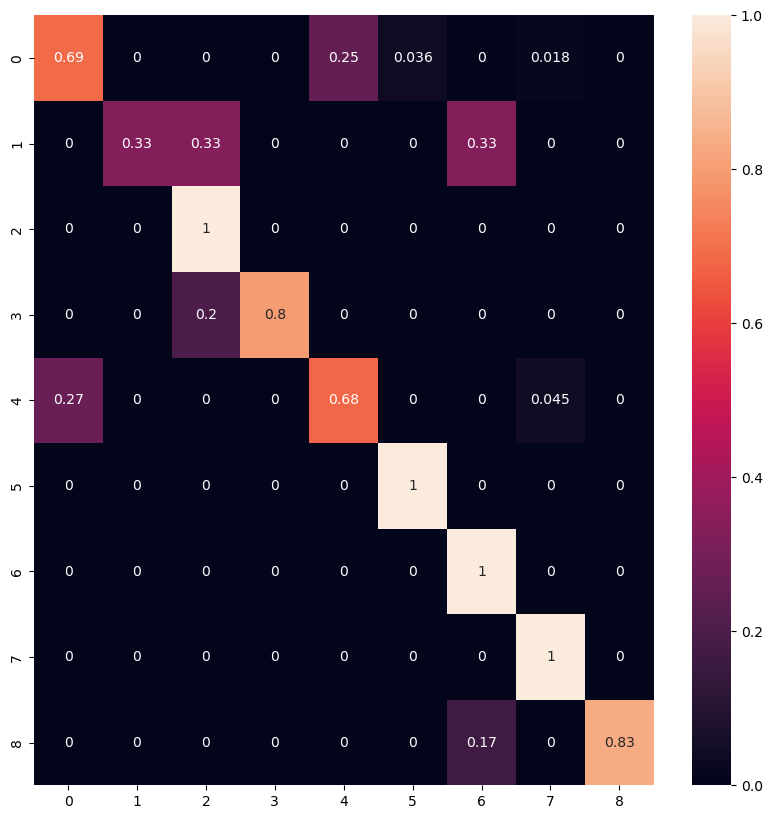

In [20]:
from xgboost import XGBClassifier#XGBcalssifier
from xgboost import callback
early_stop = callback.EarlyStopping(
    rounds=4, metric_name='mlogloss', save_best=True
)
try:
    filename = './model_win3/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
except:
    xgbcl=XGBClassifier( eval_metric='mlogloss', random_state=10,callbacks=[early_stop])
    xgbcl.fit(all_feature_smote, all_label_smote,eval_set=[(X_test, y_test)])

pred_xgb=xgbcl.predict(X_test)
from sklearn import metrics #accuracy measure
print(metrics.classification_report(pred_xgb,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred_xgb,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [21]:
# X_train_with_predictions.shape

In [22]:
# X_train_with_predictions=df.drop(["label"],axis=1)
# y_train_with_predictions=df['label']
# X_test["previous_label"]=pred_xgb
# all_feature_smote_with_predictions, all_label_smote_with_predictions = sm.fit_resample(X_train_with_predictions,y_train_with_predictions)
# from xgboost import XGBClassifier#XGBcalssifier
# xgbcl=XGBClassifier( eval_metric='aucs‌', random_state=10)
# xgbcl.fit(all_feature_smote_with_predictions, all_label_smote_with_predictions)
# # filename = './smote_xgb_model_acc.sav'
# # xgbcl=joblib.load(filename)
# pred_xgb_with_predictions=xgbcl.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred_xgb_with_predictions,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_xgb_with_predictions,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [23]:
# rf_with_predictions=RandomForestClassifier(random_state=10,n_estimators=3000,criterion='log_loss')
# rf_with_predictions.fit(all_feature_smote_with_predictions, all_label_smote_with_predictions)
# # filename = './smote_xgb_model_acc.sav'
# # xgbcl=joblib.load(filename)
# pred_rf_with_predictions=rf_with_predictions.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred_rf_with_predictions,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_rf_with_predictions,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [24]:
filename = './model_win3/new/smote_xgb_model2.sav'
joblib.dump(xgbcl, filename)

['./model_win3/new/smote_xgb_model2.sav']

              precision    recall  f1-score   support

           0       0.75      0.65      0.69        51
           1       1.00      0.50      0.67         2
           2       0.86      1.00      0.92        12
           3       1.00      0.80      0.89         5
           4       0.48      0.50      0.49        28
           5       0.33      1.00      0.50         1
           6       0.80      1.00      0.89         4
           7       0.91      1.00      0.95        21
           8       0.80      1.00      0.89         4

    accuracy                           0.73       128
   macro avg       0.77      0.83      0.77       128
weighted avg       0.74      0.73      0.73       128



<Axes: >

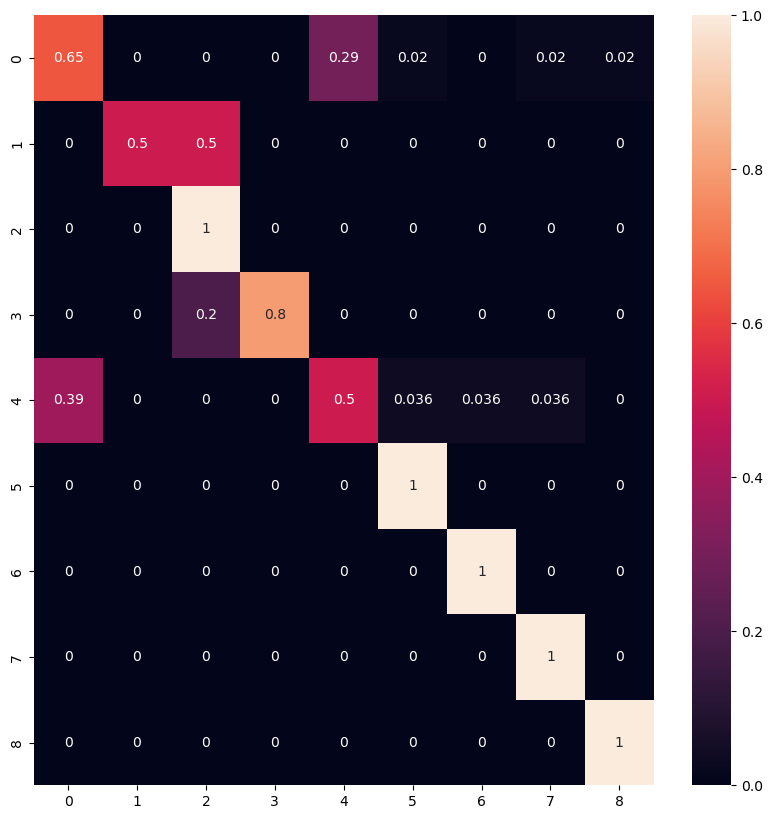

In [25]:
from sklearn.ensemble import HistGradientBoostingClassifier
HGBC=HistGradientBoostingClassifier(random_state=10)
# HGBC.fit(X_train,y_train)
try:
    filename = './model_win3/smote_HGBC_model2.sav'
    HGBC=joblib.load(filename)
except:
    HGBC.fit(all_feature_smote, all_label_smote )

pred=HGBC.predict(X_test)

print(metrics.classification_report(pred,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [26]:
filename = './model_win3/smote_HGBC_model2.sav'
joblib.dump(HGBC, filename)

['./model_win3/smote_HGBC_model2.sav']

In [27]:
def predict0_4(df):
#     print(df['label_pred'])
#     print(df['label_pred'] in [1,2,3,5,6,7,8])
    if df['previous_label'] in [1,2,3,5,6,7,8]:
        return df['previous_label']
    else:
#         print(np.array(df.drop(["label","previous_label",'label_pred'])))
# xgb_class0_4
        return xgbcl.predict(np.array(df.drop(["label",'previous_label'
                                    ])).reshape(1,-1)).view().item()

sm
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        44
           1       0.33      1.00      0.50         1
           2       1.00      0.86      0.92        14
           3       0.80      1.00      0.89         4
           4       0.68      0.52      0.59        29
           5       1.00      0.33      0.50         3
           6       1.00      0.60      0.75         5
           7       1.00      0.91      0.95        23
           8       0.83      1.00      0.91         5

    accuracy                           0.78       128
   macro avg       0.82      0.79      0.75       128
weighted avg       0.80      0.78      0.78       128



<Axes: >

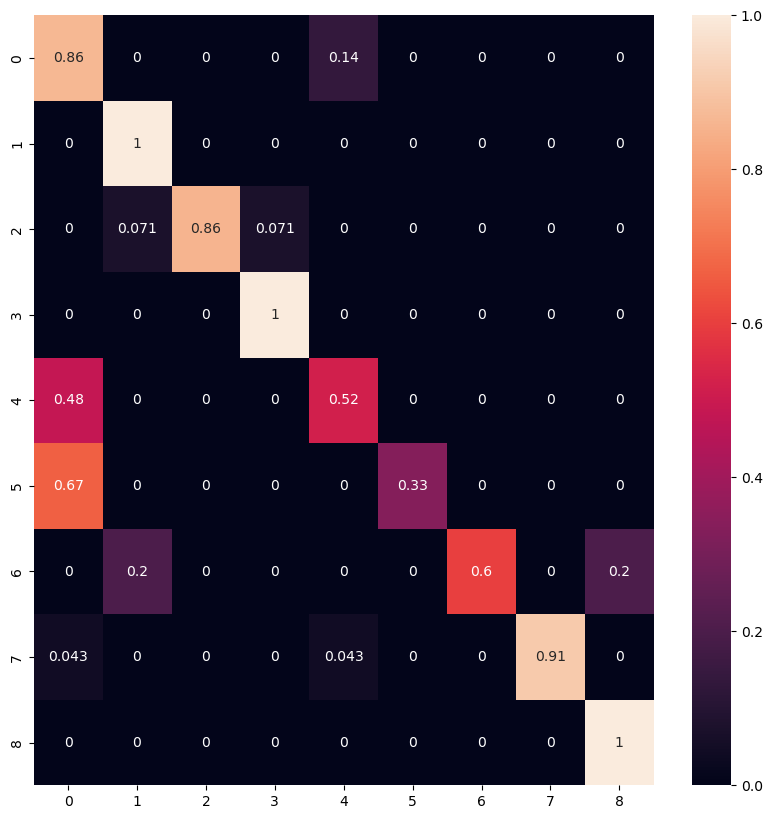

In [28]:
from sklearn.ensemble import AdaBoostClassifier
test['previous_label']=pred_xgb
# test['previous_label']=list(pred_xgb).insert(0,0)
df_class0_4=df[df['label'].isin([0,4])]
X_train_class0_4=df_class0_4.drop(["label",'previous_label'],axis=1)
y_train_class0_4=df_class0_4.label
X_train_class0_4=np.array(X_train_class0_4)
y_train_class0_4=np.array(y_train_class0_4)
X_train_class0_4sm,y_train_class0_4sm = sm.fit_resample(X_train_class0_4,y_train_class0_4)
xgb_class0_4=RandomForestClassifier(random_state=10,n_estimators=30,criterion='gini')#XGBClassifier( eval_metric='logloss', random_state=10)
try:
    print('sm')
#     xgb_class0_4.fit(X_train_class0_4sm, y_train_class0_4sm)
except:
    print('no sm')
#     xgb_class0_4.fit(X_train_class0_4, y_train_class0_4)
test['label_pred']=test.apply(lambda x:predict0_4(x),axis=1)

# test_class0_4=test[(test['label_pred'].isin([0,4]))&(test['label'].isin([0,4]))]
# X_test_class0_4=test_class0_4.drop(["label","previous_label",'label_pred'],axis=1)
# y_test_class0_4=test_class0_4.label
# # X_test_class0_4=np.array(X_test_class0_4)
# # y_test_class0_4=np.array(y_test_class0_4)

# pred_class0_4=xgb_class0_4.predict(X_test_class0_4)
print(metrics.classification_report(test['label'],test['label_pred']))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(test['label'],test['label_pred'], normalize='true')
sns.heatmap(conf,annot=True)

In [29]:
test

,left_elbow_shoulder_hip mean_ft,left_elbow_shoulder_hip std_ft,left_elbow_shoulder_hip max_ft,left_elbow_shoulder_hip min_ft,left_elbow_shoulder_hip var_ft,left_elbow_shoulder_hip med_ft,left_elbow_shoulder_hip sum_ft,left_elbow_shoulder_hip std,left_elbow_shoulder_hip kurtosis,left_elbow_shoulder_hip skew,...,movingcenter_y std,movingcenter_y kurtosis,movingcenter_y skew,movingcenter_y quantile 25,movingcenter_y quantile 75,movingcenter_y RMS,movingcenter_y MAV,previous_label,label,label_pred
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,8,8.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,8,8.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,8,8.0
3,0.036114,0.102283,0.352432,0.000000,0.010462,0.000000,3.250234,0.102283,4.217448,2.487866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,8,8.0
4,0.657108,0.102358,0.737138,0.384864,0.010477,0.713751,59.139730,0.102358,0.375738,-1.341668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7,7.0
124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7,7.0
125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7,7.0
126,0.133487,0.258373,0.673527,0.000000,0.066756,0.000000,12.013798,0.258373,0.046330,1.425168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,7,4.0


In [30]:
# int([1])

In [31]:
# from sklearn.ensemble import AdaBoostClassifier
# ada=AdaBoostClassifier(random_state=10)
# ada.fit(X_train,y_train)
# pred=ada.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [32]:
# from catboost import CatBoostClassifier
# # catboost=CatBoostClassifier()
# # catboost.fit(X_train,y_train)
# filename = './catboost_model.sav'
# catboost=joblib.load(filename)
# pred=catboost.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [33]:
# filename = './catboost_model.sav'
# joblib.dump(catboost, filename)

In [34]:
# from keras.layers import TimeDistributed
# # # trainX=np.array(X_train)
# # testX=np.array(X_test)
# # # trainY=np.array(y_train)
# # testY=np.array(y_test)
# # trainX=np.array(all_feature_smote)
# # trainY=np.array(all_label_smote)
# df_class0_4=df[df['label'].isin([0,4])]
# X_train_class0_4=df_class0_4.drop(["label","previous_label"],axis=1)
# y_train_class0_4=df_class0_4.label
# X_train_class0_4sm,y_train_class0_4sm = sm.fit_resample(X_train_class0_4,y_train_class0_4)
# trainX=np.array(X_train_class0_4sm)
# trainY=np.array(y_train_class0_4sm)

# test_class0_4=test[test['label'].isin([0,4])]
# X_test_class0_4=test_class0_4.drop(["label","previous_label",'label_pred'],axis=1)
# y_test_class0_4=test_class0_4.label
# testX=np.array(X_test_class0_4)
# testY=np.array(y_test_class0_4)

# # # testY = tf.keras.utils.to_categorical(testY)
# # # trainY = tf.keras.utils.to_categorical(trainY)
# # trainX = np.expand_dims(trainX, 2)
# # testX = np.expand_dims(testX, 2)

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# from tensorflow.keras import models
# model = models.Sequential()
# model.add(layers.Input(shape=(len(trainX[1]), 1)))
# model.add(layers.Conv1D(64,64, activation='relu'))
# # model.add(LSTM(units=3, return_sequences=True))
# # model.add(LSTM(units=64, return_sequences=True))
# model.add(layers.MaxPooling1D(4))
# model.add(layers.Conv1D(32, 32, activation='relu'))
# model.add(layers.MaxPooling1D(4))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Conv1D(16, 16, activation='relu'))
# model.add(LSTM(units=64, return_sequences=True))
# # model.add(LSTM(units=32, return_sequences=True))
# model.add(LSTM(units=16, return_sequences=True))
# model.add(Dropout(0.5))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(9,activation='softmax'))
# mcp_save = ModelCheckpoint('DL_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit(trainX,trainY, epochs=100, 
#                     validation_data=(testX,testY), 
#                     callbacks=[early_stopping,mcp_save])

In [35]:
# plt.clf()
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label = 'val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')

# plt.legend(loc='lower right')

In [36]:
# pred=model.predict(testX)
# pred=np.argmax(pred,axis=1)
# print(metrics.classification_report(pred,testY))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,testY, normalize='true')
# sns.heatmap(conf,annot=True)

In [37]:
# model_rnn = Sequential()
# model_rnn.add(LSTM(units=64, return_sequences=True, input_shape=(len(trainX[1]), 1)))
# model_rnn.add(Conv1D(128, 6))
# model_rnn.add(LSTM(units = 64, return_sequences = True))
# model_rnn.add(Dropout(0.2))
# model_rnn.add(Conv1D(128, 3))
# model_rnn.add(LSTM(units = 64, return_sequences = True))

# model_rnn.add(Dropout(0.2))
# model_rnn.add(LSTM(units = 64))

# model_rnn.add(Dense(units = 128))
# model_rnn.add(Dense(units = 64))

# model_rnn.add(Dense(units = 9, activation="softmax")) #4 as the output classes

# # Define the BRNN model with LSTM layers
# model_brnn = keras.Sequential([
#     layers.Bidirectional(layers.LSTM(64, activation='relu', return_sequences=True), 
#                          input_shape=(len(trainX[1]), 1)),
# #     layers.Bidirectional(layers.LSTM(64, activation='relu')),
# #     layers.Bidirectional(layers.LSTM(32, activation='relu')),
#     layers.Bidirectional(layers.LSTM(16, activation='relu')),
    
#     layers.Dense(9, activation='softmax')
# ])

In [38]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Compile the RNN model
# model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Compile the BRNN model
# model_brnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Define early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the RNN model with early stopping

# ## model_rnn.fit(all_feature, all_label, epochs=100, batch_size=500, validation_data=(X_vad, y_vad), callbacks=[early_stopping])

# # Train the BRNN model with early stopping

# model_brnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# # history_brnn=model_brnn.fit(trainX,trainY, epochs=10, batch_size=500,
# #                             validation_data=(testX,testY), callbacks=[early_stopping])
# # , callbacks=[early_stopping]

In [39]:
# history_rnn=model_rnn.fit(trainX,trainY, epochs=20,
#                             validation_data=(testX,testY), callbacks=[early_stopping])


In [40]:
len(all_label_smote)

20628

In [41]:
def output_xgb(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df_acc_win3/{ID}')
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_win3/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(pred,y_test,average='weighted')
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(pred,y_test, normalize='true',labels=[i for i in range(9)])
    sns.heatmap(conf,annot=True)
#     print(ID)
#     print(np.unique(pred))
#     print(np.unique(y_test))
    plt.savefig(f"./image/xgb_gan_win3/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s])

,ID,accuracy,weighted avg F1-score
0,S08T1,0.758065,0.761104
1,S08T2,0.673575,0.671284
2,N11T1,0.800000,0.822974
3,N11T2,0.725664,0.745863
4,N06T1,0.558140,0.549392
5,S02T2,0.617834,0.636956
6,N06T2,0.768362,0.769610
7,S02T1,0.612903,0.631974
8,N02T2,0.526316,0.531951
9,N02T1,0.620253,0.608874


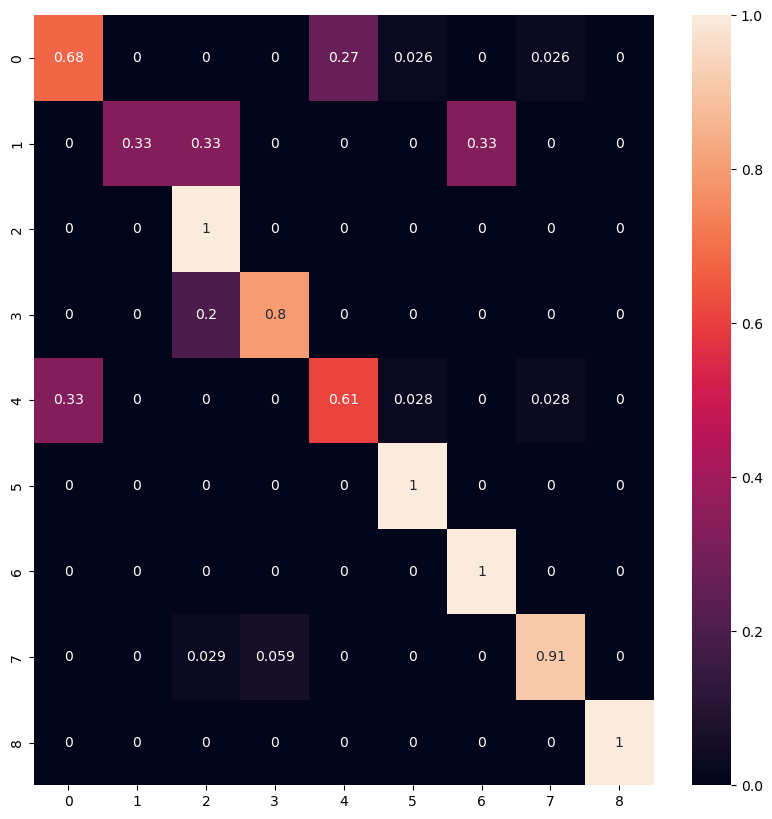

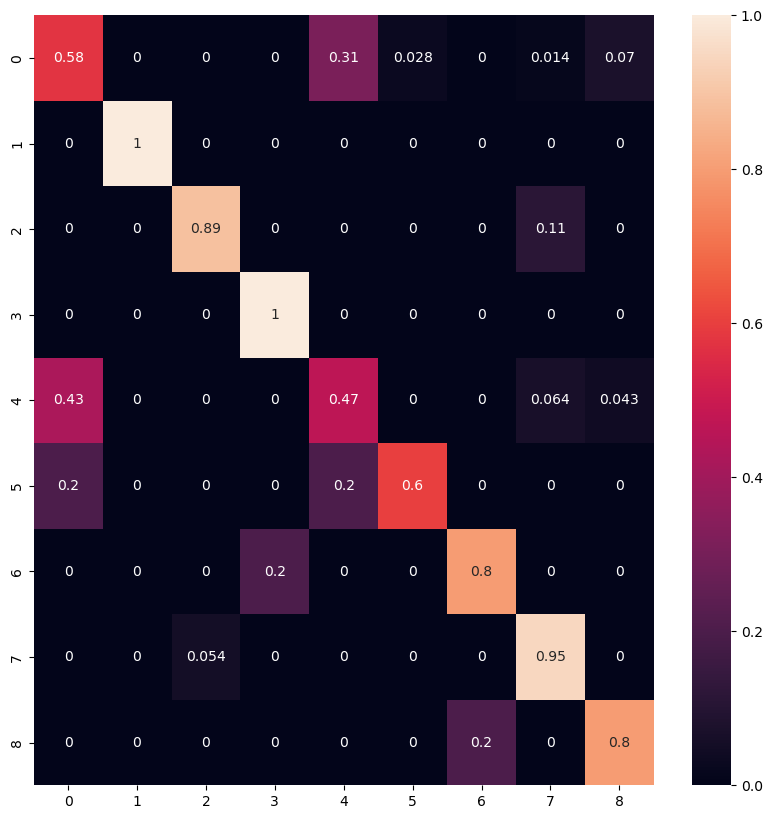

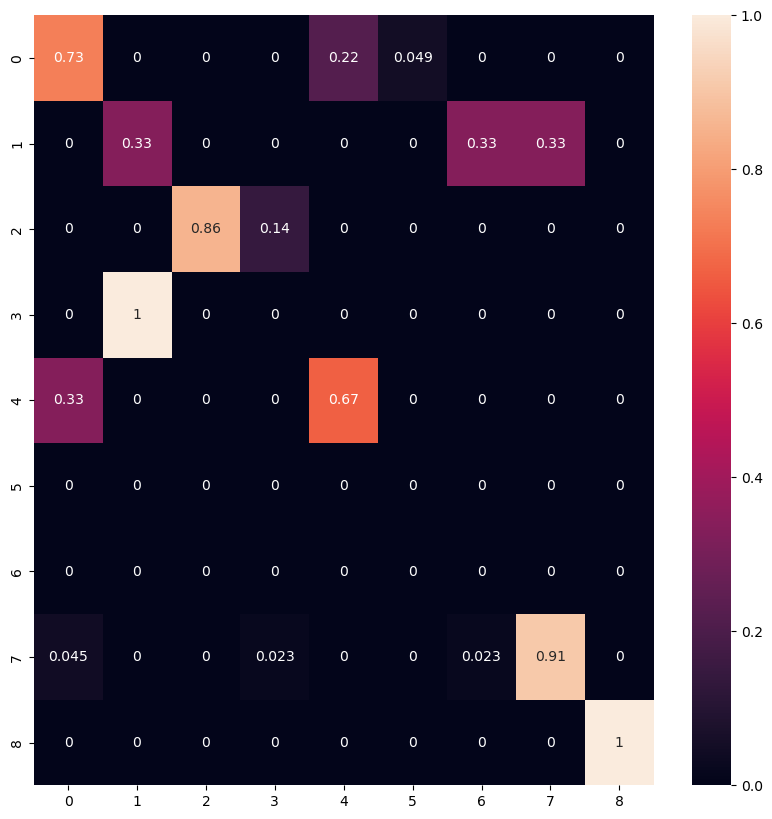

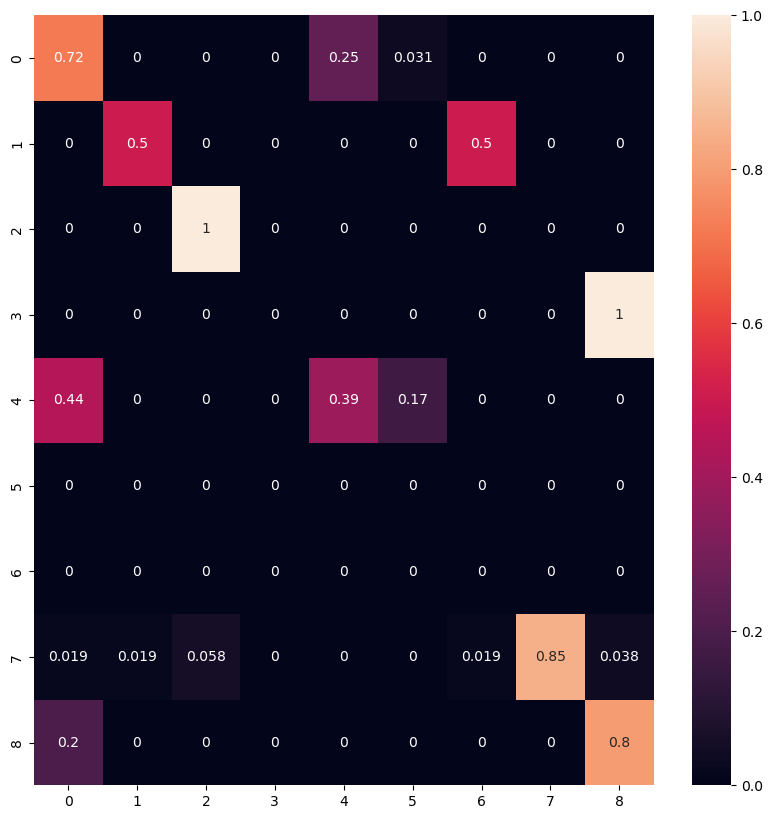

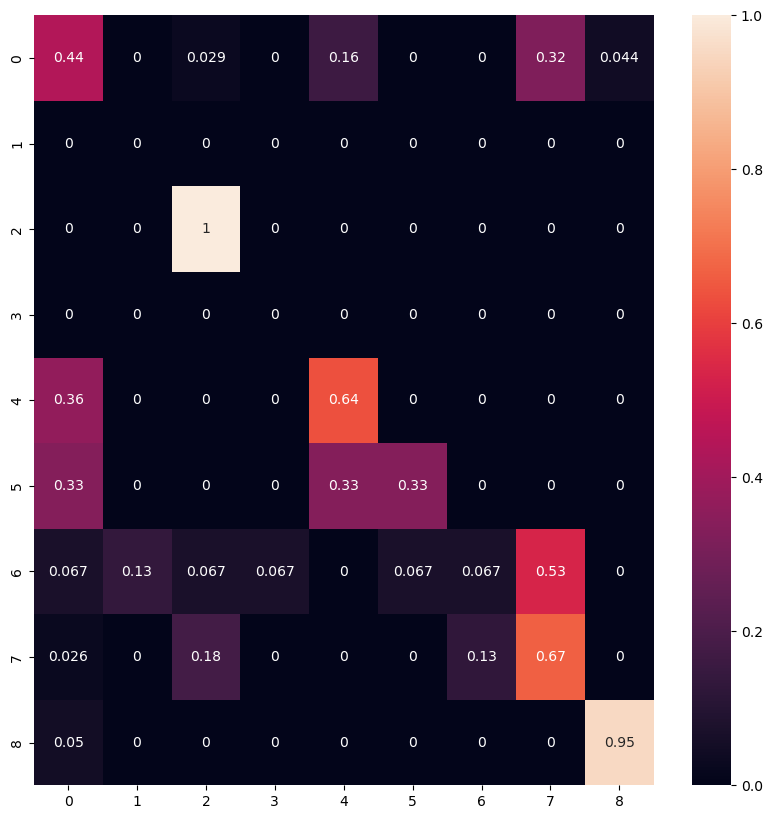

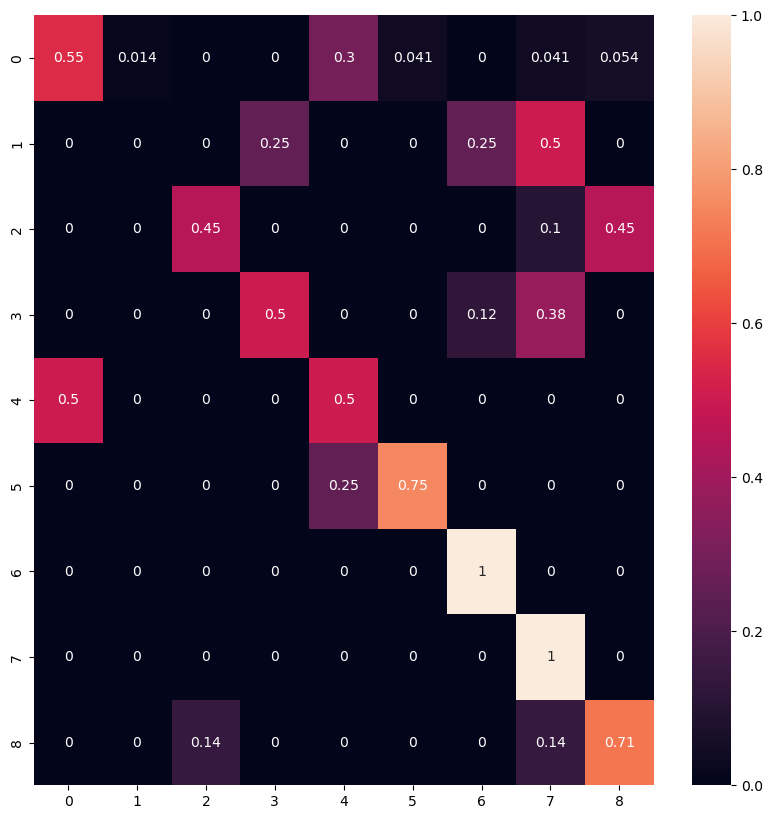

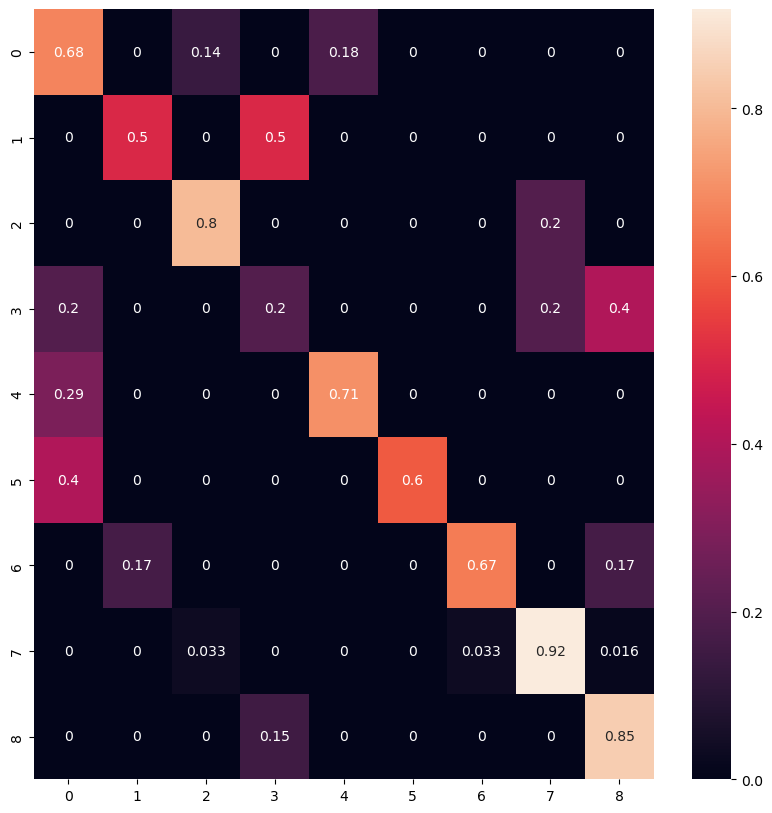

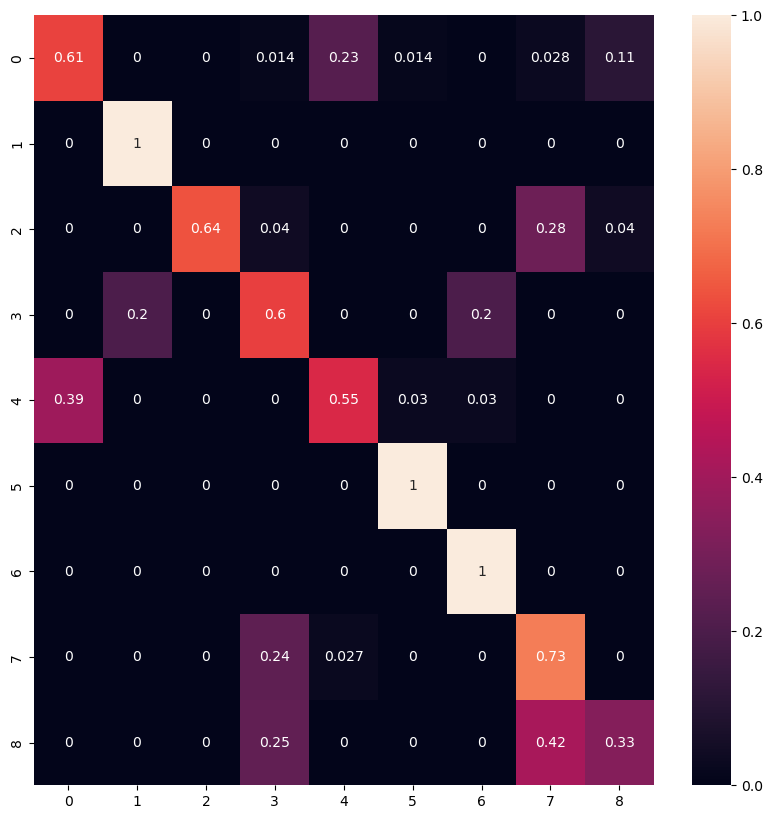

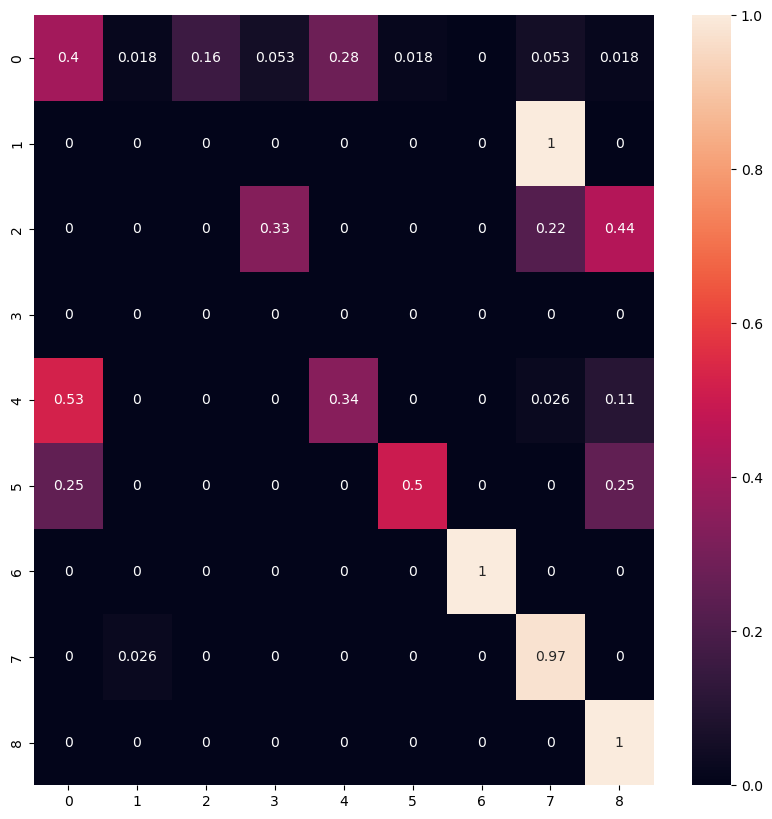

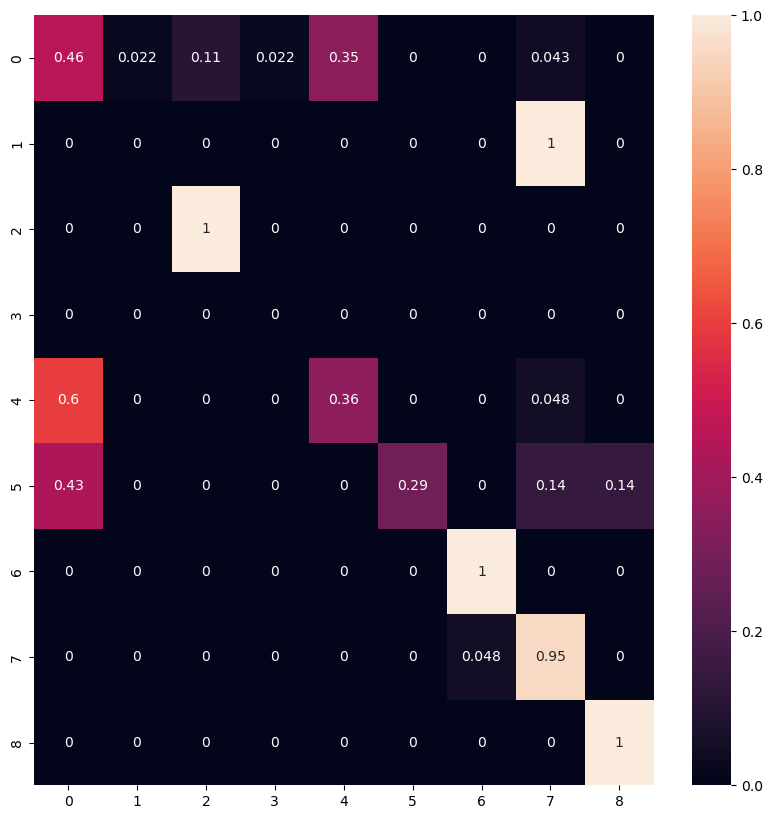

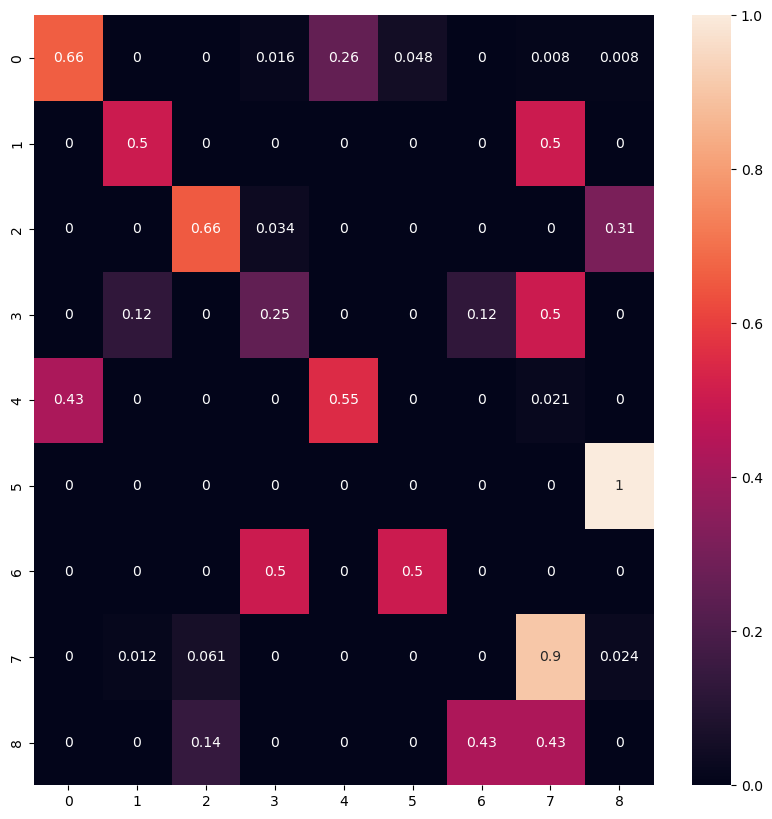

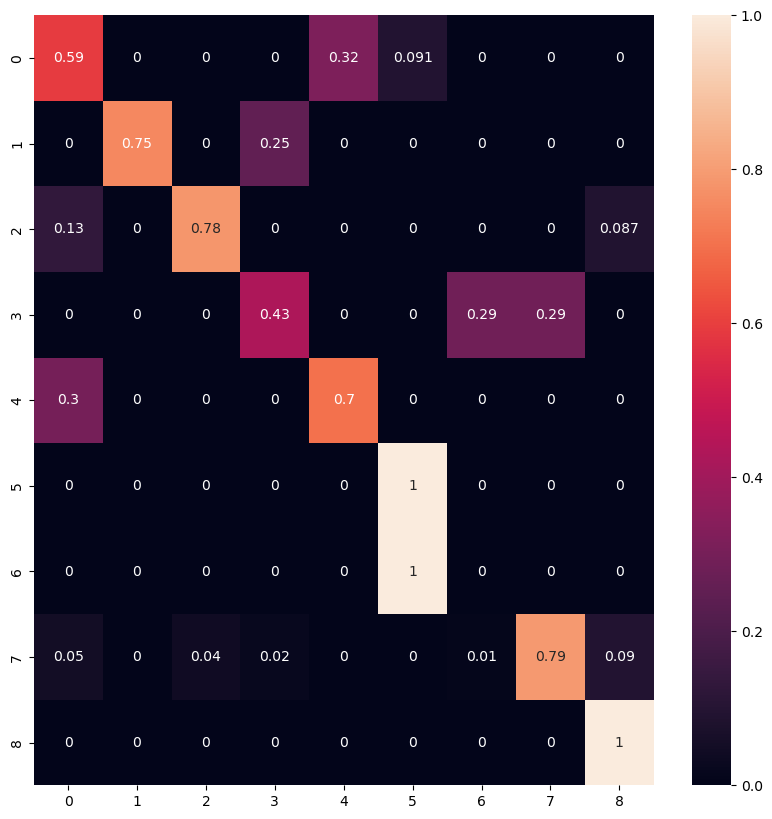

In [42]:
test_set=os.listdir('./test_set_df_acc_win1')
out_xgb=[]
for ID in test_set:
    if ID.endswith(".csv"):
        output_xgb(ID,out_xgb)
out_df_xgb=pd.DataFrame(out_xgb,columns=['ID','accuracy','weighted avg F1-score'])
out_df_xgb

In [43]:
test_set=os.listdir('./test_set_df')
test_set

['.DS_Store',
 'S08T1.csv',
 'S08T2.csv',
 'N11T1.csv',
 'N11T2.csv',
 'N06T1.csv',
 'S02T2.csv',
 'N06T2.csv',
 'S02T1.csv',
 'N02T2.csv',
 'N02T1.csv',
 'S03T1.csv',
 'S03T2.csv']

In [44]:
def output_rf(ID,out):
    test=pd.read_csv(f'./test_set_df_acc_win3/{ID}')
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_win3/smote_HGBC_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(pred,y_test,average='weighted')
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(pred,y_test,labels=[i for i in range(9)]
                                  , normalize='true')
    sns.heatmap(conf,annot=True)
    plt.savefig(f"./image/rf_gan_win3/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s])

,accuracy,weighted avg F1-score
count,12.000000,12.000000
mean,0.691711,0.713699
std,0.082508,0.081457
min,0.500000,0.539886
25%,0.681746,0.698937
50%,0.695997,0.729028
75%,0.738653,0.745819
max,0.808696,0.829413


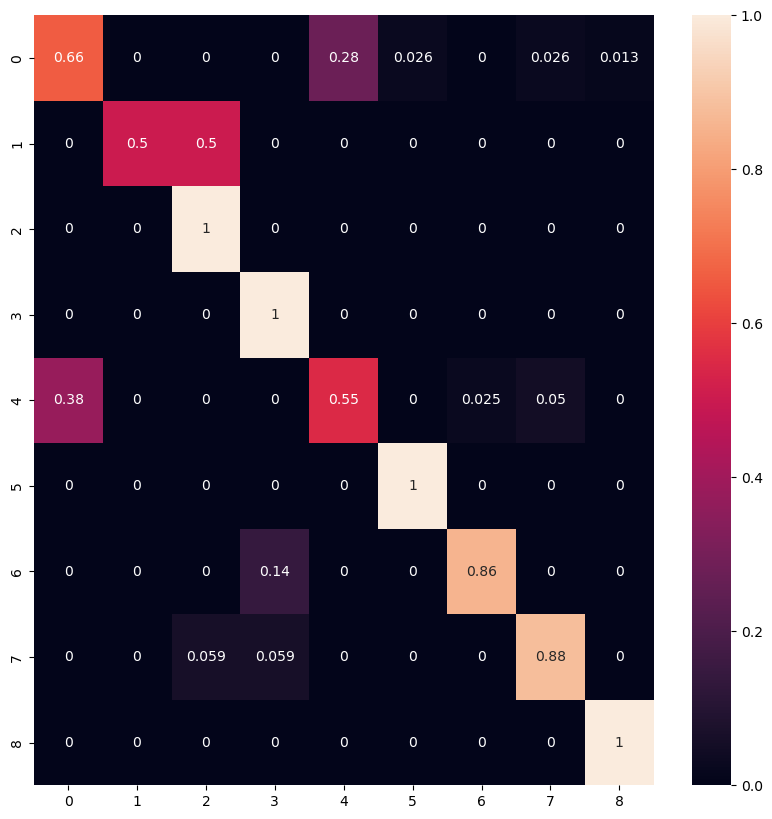

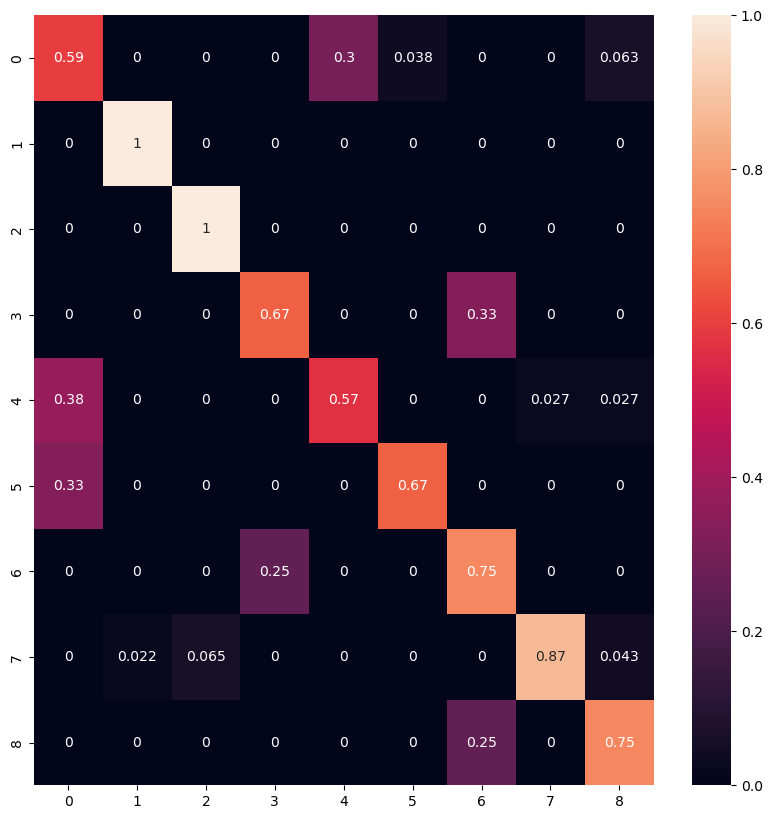

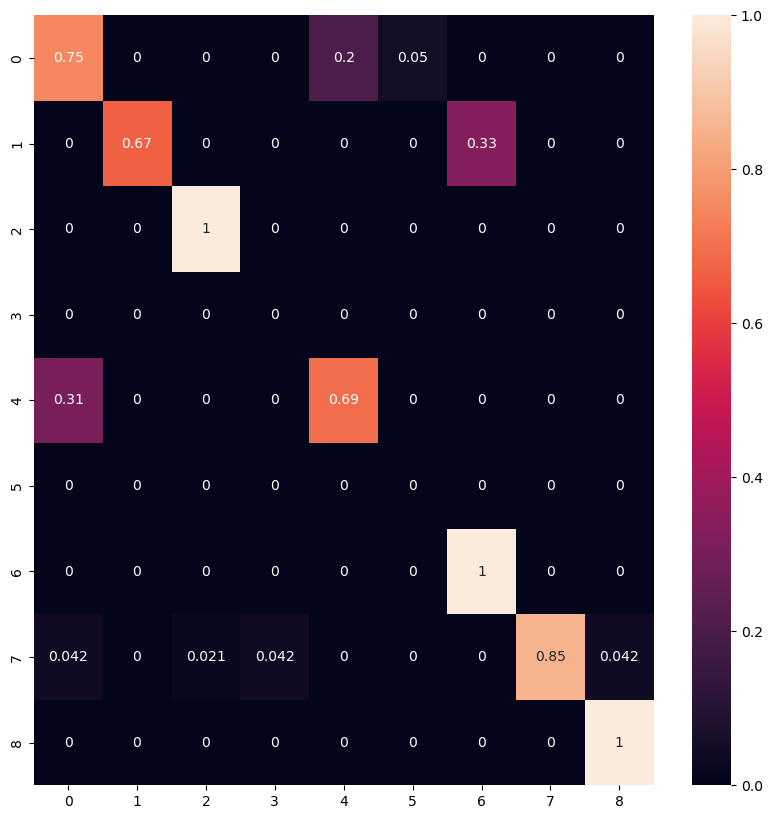

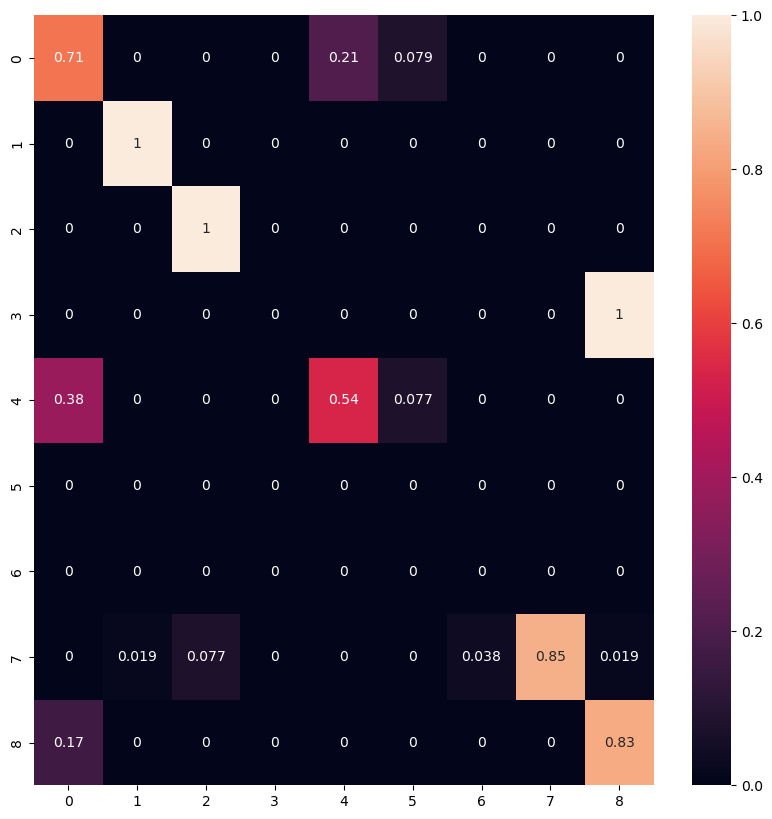

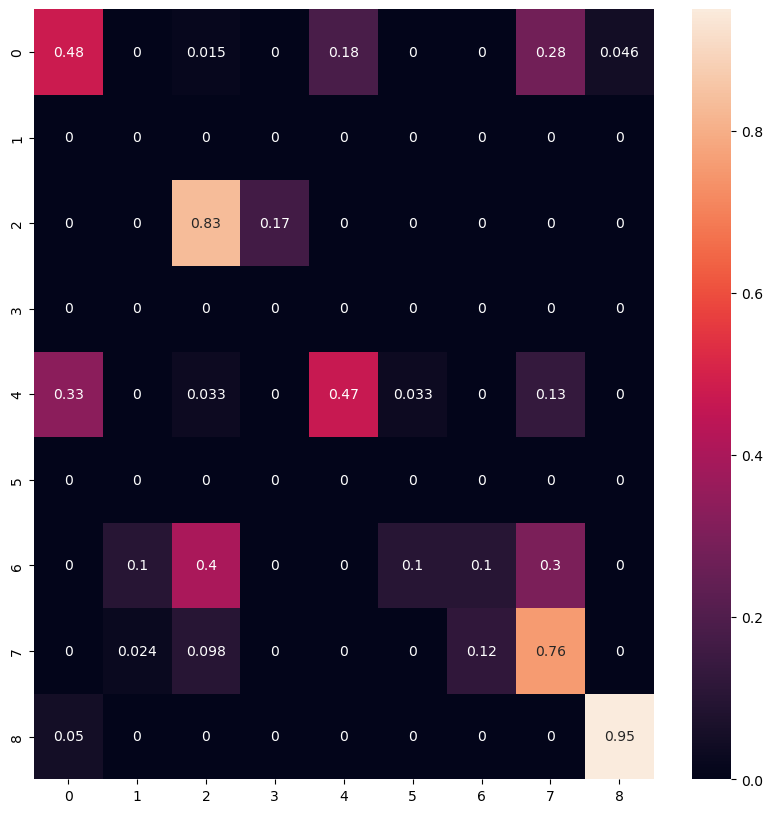

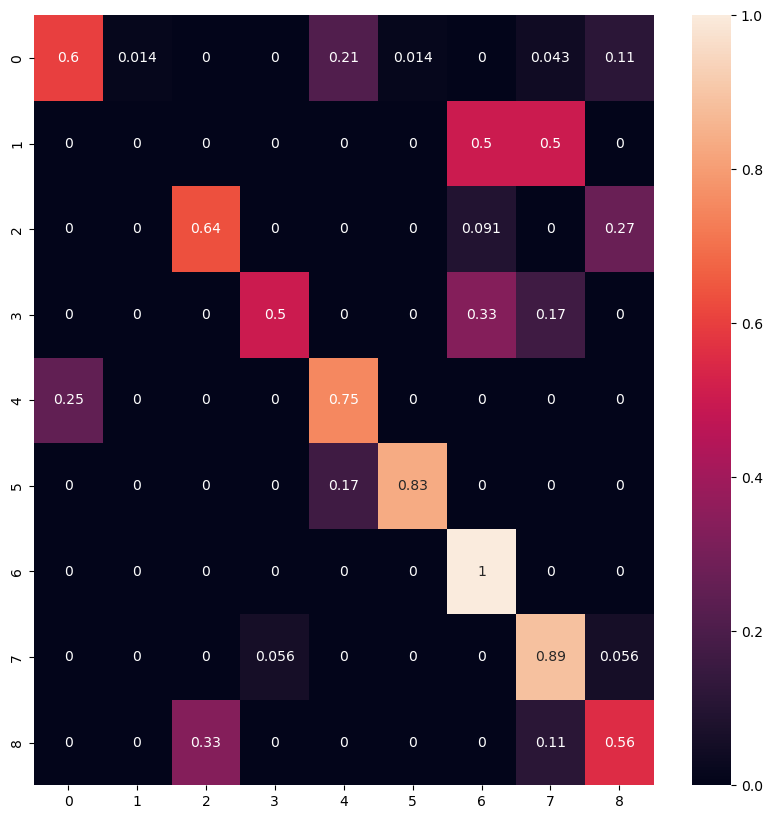

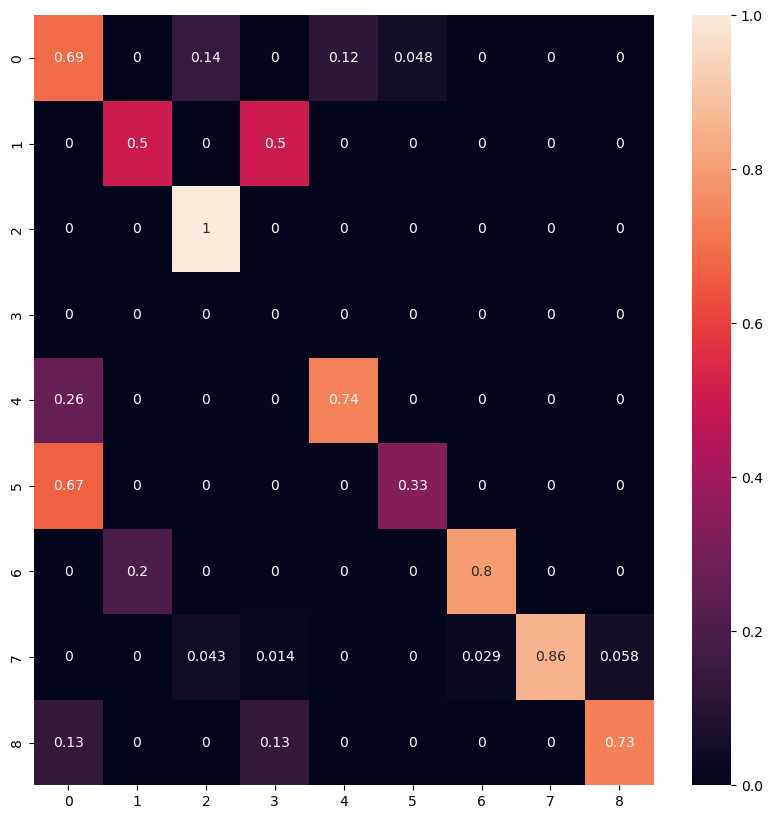

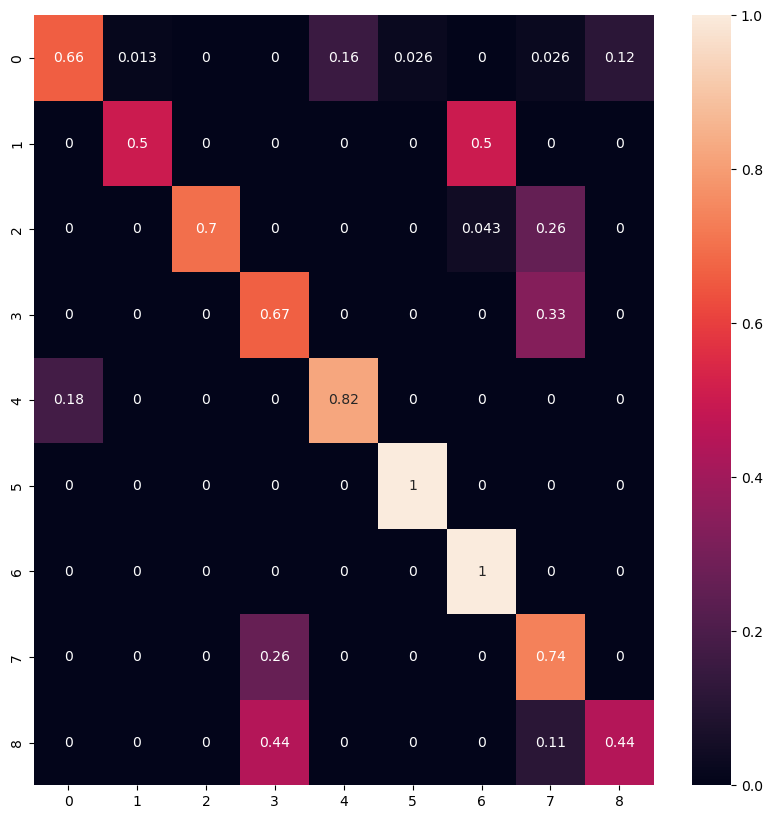

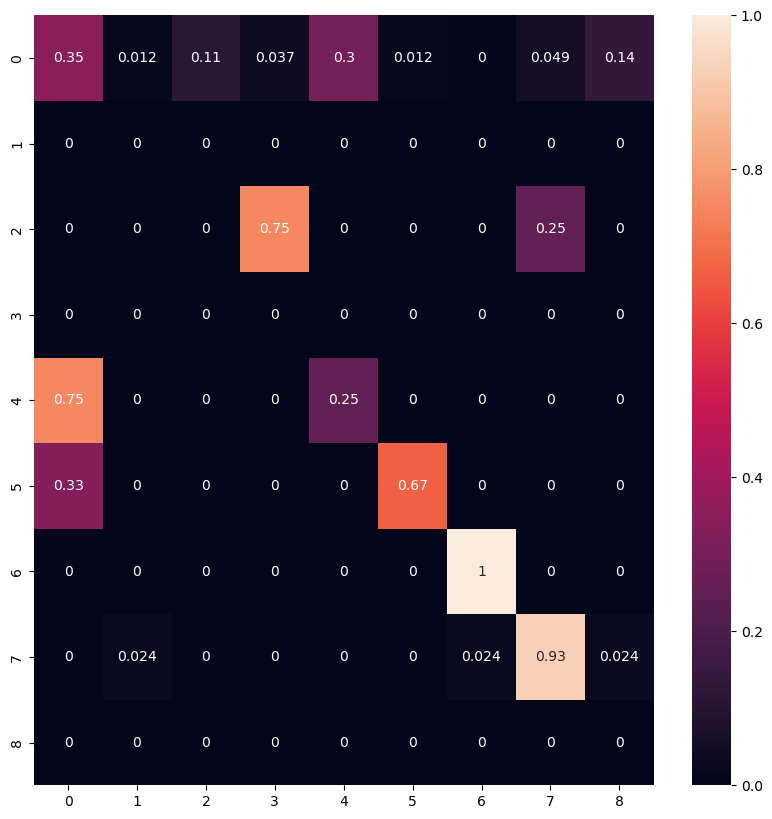

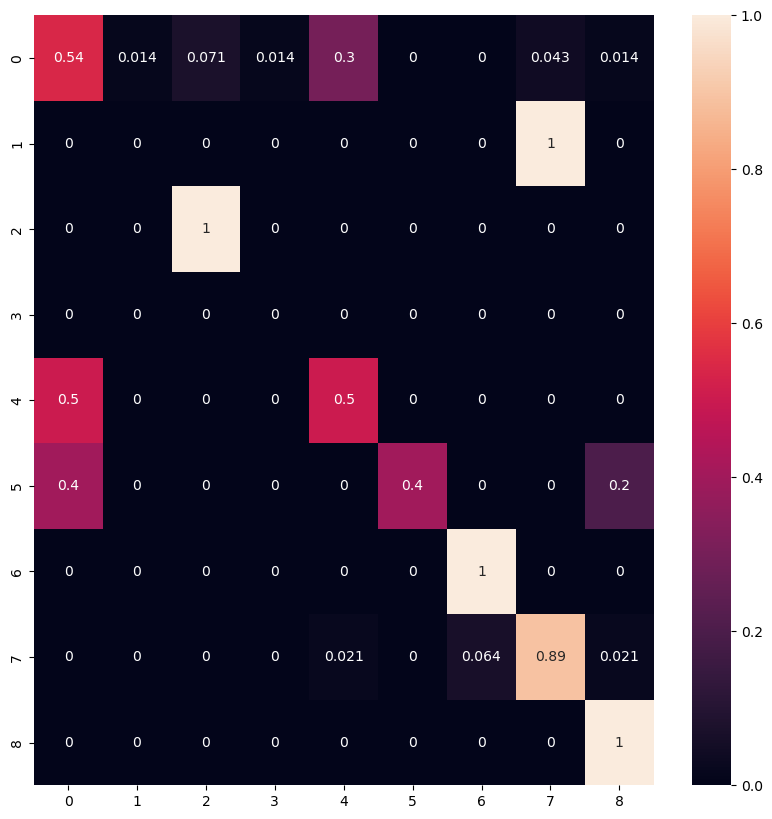

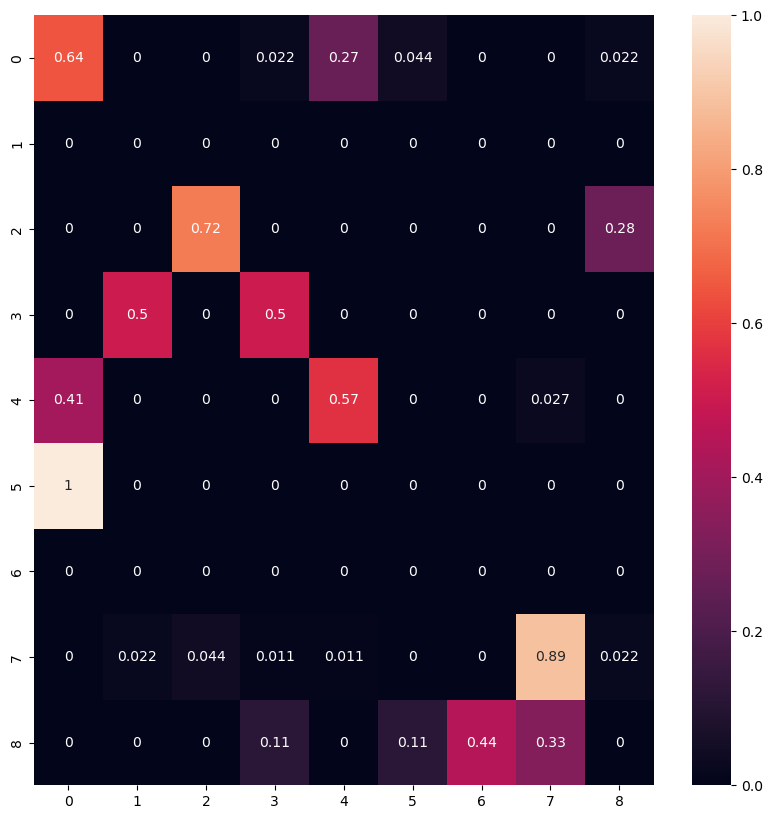

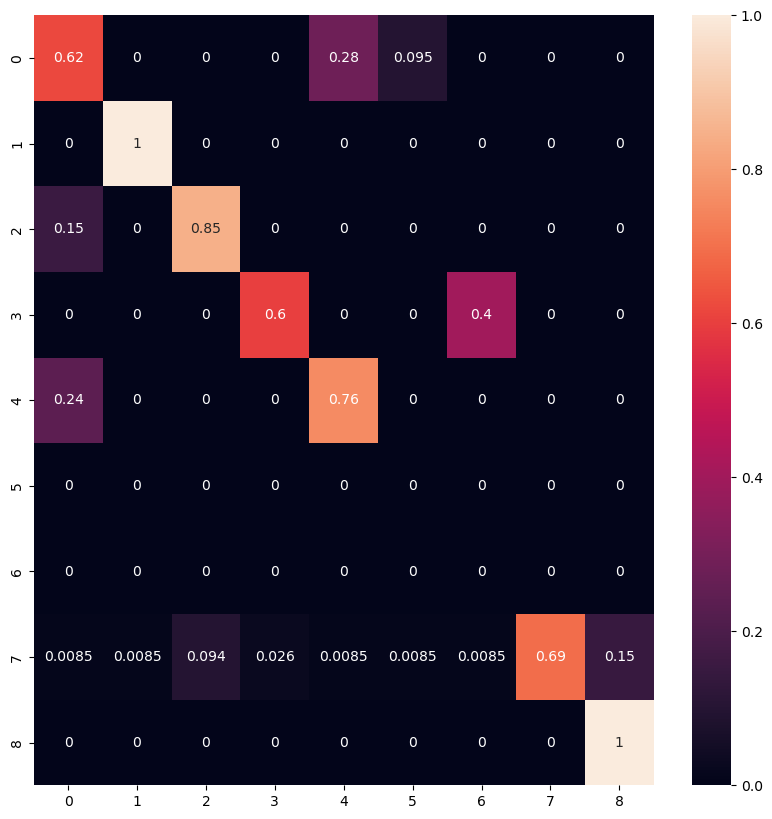

In [45]:
test_set=os.listdir('./test_set_df_acc_win1')
out_rf=[]
for ID in test_set:
    if ID.endswith(".csv"):
        output_rf(ID,out_rf)
out_df=pd.DataFrame(out_rf,columns=['ID','accuracy','weighted avg F1-score'])
out_df.describe()

In [46]:
out_df.describe()#HGBC not rf model :(

,accuracy,weighted avg F1-score
count,12.000000,12.000000
mean,0.691711,0.713699
std,0.082508,0.081457
min,0.500000,0.539886
25%,0.681746,0.698937
50%,0.695997,0.729028
75%,0.738653,0.745819
max,0.808696,0.829413


In [47]:
out_df_xgb.describe()

,accuracy,weighted avg F1-score
count,12.000000,12.000000
mean,0.669748,0.679463
std,0.085257,0.090541
min,0.526316,0.531951
25%,0.616602,0.626199
50%,0.675071,0.683640
75%,0.733764,0.749673
max,0.800000,0.822974
